<a href="https://colab.research.google.com/github/pritam-banik-roy/Bengali_speech-Emotion-recognition/blob/main/PRITAM_SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import pandas as pd

In [ ]:
import librosa as lr
pbr_recording = '/content/03-01-05-01-03-03-34.wav'
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
audio, sr = lr.load(pbr_recording)#sr = sampling rate
print(audio)
print(sr)

[-2.5530397e-03 -3.8213967e-03 -3.6855035e-03 ... -9.1550701e-06
 -1.0925238e-05  1.4684877e-06]
22050


In [ ]:
len(audio)

78336

In [ ]:
sample_duration = 1/sr
print("Duration of my voice signal is"+str(sample_duration)+"sec")

Duration of my voice signal is4.5351473922902495e-05sec


In [ ]:
duration = sample_duration*len(audio)
duration

3.5526530612244898

In [ ]:
time = np.arange(0,78336)/sr

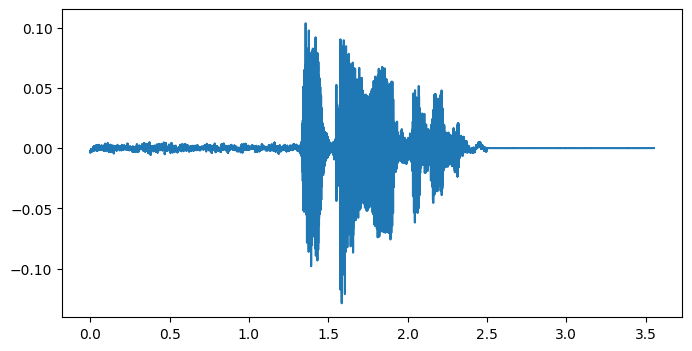

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time, audio)

## **zcr**

In [ ]:
zcr = lr.feature.zero_crossing_rate(audio)

In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

## **FFT**

In [ ]:
FIG_SIZE = (8,4)


In [ ]:
my_voice, sampling_rate = librosa.load(pbr_recording, sr=22050)

NameError: name 'librosa' is not defined

Text(42.347222222222214, 0.5, 'Amplitude')

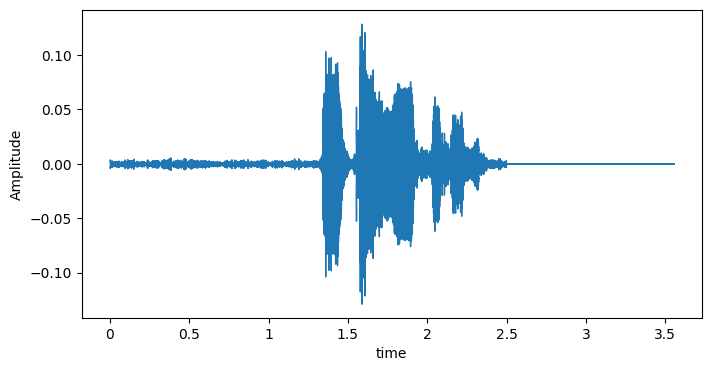

In [ ]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(my_voice)
plt.xlabel("time")
plt.ylabel("Amplitude")

In [ ]:
my_fft = np.fft.fft(my_voice)#Here signal is stored in my_voice

In [ ]:
my_fft

array([-0.2906105 +0.j        , -0.84523494+0.52460114j,
       -0.78413855-0.13652575j, ...,  0.01619415-0.4166264j ,
       -0.78413855+0.13652575j, -0.84523494-0.52460114j])

## **spectrum**

In [ ]:
spectrum = np.abs(my_fft)
len(spectrum)

78336

In [ ]:
f = np.linspace(0, sampling_rate, len(spectrum))
f

array([0.00000000e+00, 2.81483373e-01, 5.62966745e-01, ...,
       2.20494370e+04, 2.20497185e+04, 2.20500000e+04])

In [ ]:
left_spectrum = spectrum[:int(len(spectrum)/2)]#Y AXIS VARIABLE
len(left_spectrum)

39168

In [ ]:
left_f = f[:int(len(spectrum)/2)]#X AXIS VARIABLE

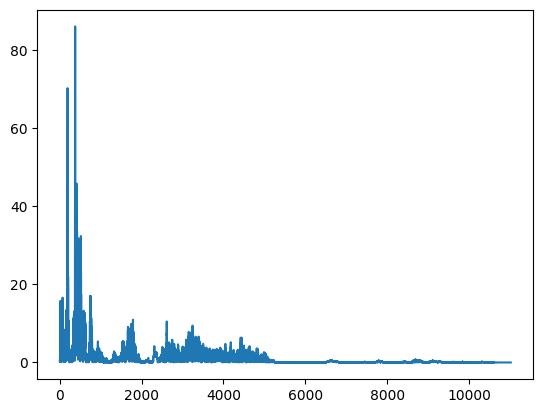

In [ ]:
plt.plot(left_f,left_spectrum)

# **spectogram**

In [ ]:
my_stft = librosa.stft(my_voice, n_fft=2048, hop_length=512)
spectrogram = np.abs(my_stft)
spectrogram

array([[6.1383027e-01, 4.1813609e-01, 1.4630507e-01, ..., 1.0067475e-04,
        8.6536119e-04, 9.6093450e-04],
       [5.9391522e-01, 5.2181202e-01, 2.2250524e-01, ..., 5.5119890e-04,
        9.5709314e-04, 8.1933726e-04],
       [4.9840245e-01, 4.0851408e-01, 5.6432251e-02, ..., 6.5798301e-04,
        4.3378244e-04, 5.2180421e-04],
       ...,
       [9.0882844e-05, 4.0184761e-05, 5.2645937e-08, ..., 1.0902997e-09,
        4.5610941e-06, 9.1894854e-06],
       [8.9215471e-05, 3.9226928e-05, 2.2008981e-08, ..., 3.1926103e-10,
        4.5621177e-06, 9.1953161e-06],
       [8.8636392e-05, 3.8899085e-05, 3.3551398e-08, ..., 2.0003060e-10,
        4.5624179e-06, 9.1928559e-06]], dtype=float32)

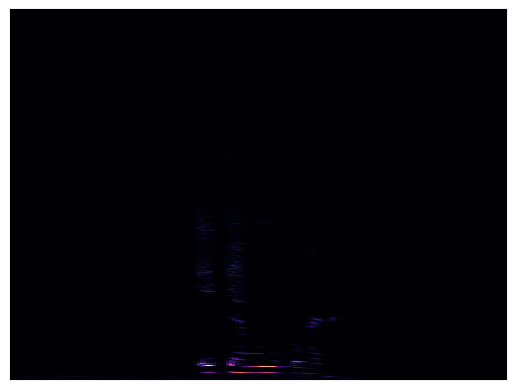

In [ ]:
librosa.display.specshow(spectrogram, sr=sampling_rate, hop_length=512)


# **log_spectrogram**

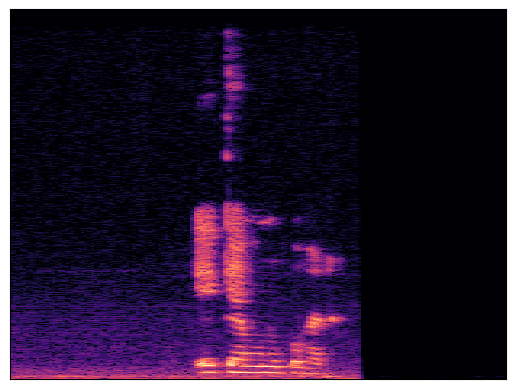

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sampling_rate, hop_length=512)

# Spectral **Rolloff**

In [ ]:
import librosa
import numpy as np

y, sr = librosa.load(pbr_recording)

# Extract the Spectral Rolloff feature
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

# Calculate the mean Spectral Rolloff value
mean_rolloff = np.mean(spectral_rolloff)

print("Mean Spectral Rolloff Value for the audio:", mean_rolloff)


Mean Spectral Rolloff Value for the audio: 5221.661931818182


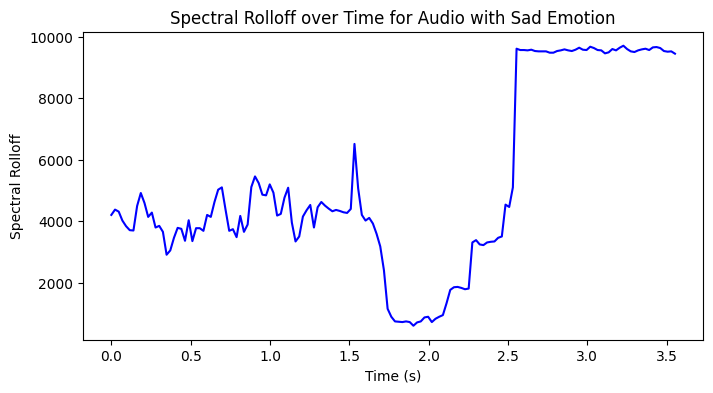

In [ ]:
# Create a time axis in seconds
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames, sr=sr)

# Plot the Spectral Rolloff feature as a line plot
plt.figure(figsize=(8, 4))
plt.plot(t, spectral_rolloff, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Rolloff')
plt.title('Spectral Rolloff over Time for Audio with Sad Emotion')
plt.show()

# **tonal_centroids**

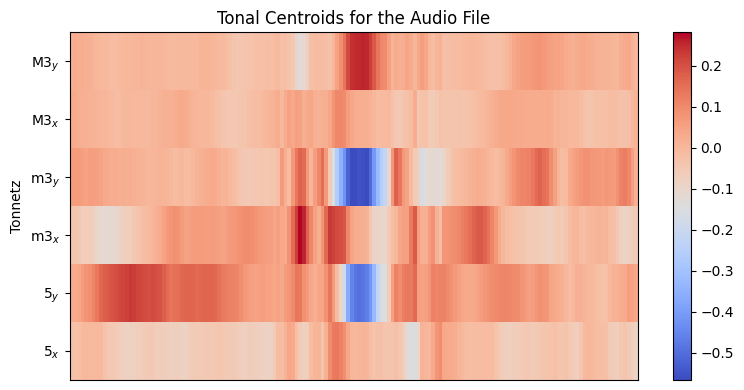

In [ ]:

y, sr = librosa.load(pbr_recording)

# Extract the tonal centroid feature
tonal_centroids = librosa.feature.tonnetz(y=y, sr=sr)

# Plot the tonal centroids
plt.figure(figsize=(8, 4))
librosa.display.specshow(tonal_centroids, y_axis='tonnetz')
plt.colorbar()
plt.title('Tonal Centroids for the Audio File')
plt.tight_layout()

plt.show()


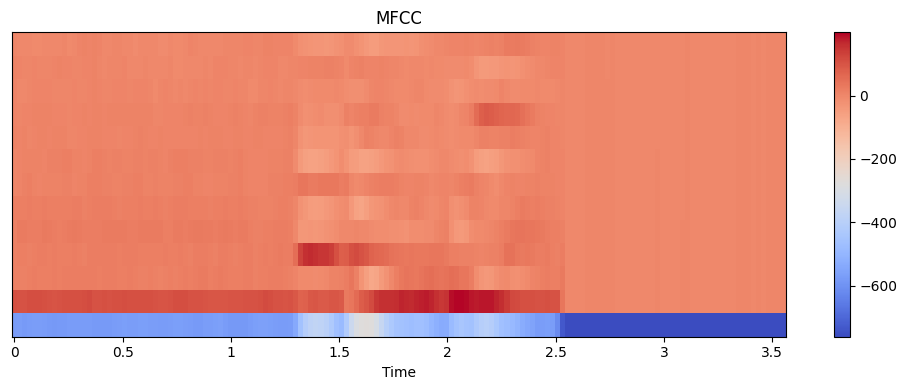

In [ ]:
# Extract the MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

plt.show()


# **spectral_centroids**

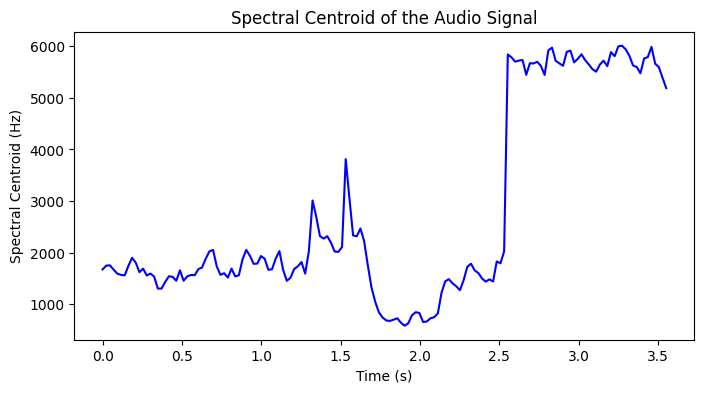

In [ ]:


# Extract the Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Compute the time variable for x-axis
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Plot the Spectral Centroid
plt.figure(figsize=(8, 4))
plt.plot(t, spectral_centroids, color='b')
plt.ylabel('Spectral Centroid (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectral Centroid of the Audio Signal')
plt.show()
